
Gem Stone PVT Ltd -Cubic Zirconia manufacturer (Inexpensive Diamond alternaive ) Price Prediction Assignments.

Problem 1: You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (An inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Dataset:cubic_zirconia.csv

Variable Name Description Carat Carat weight of the cubic zirconia. Cut Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal. Color Colour of the cubic zirconia.With D being the best and J the worst. Clarity cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 Depth The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter. Table The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter. Price the Price of the cubic zirconia. X Length of the cubic zirconia in mm. Y Width of the cubic zirconia in mm. Z Height of the cubic zirconia in mm.

Install the necessary packages and invoke the libraries.

In [ ]:
from sklearn import metrics
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings
warnings.filterwarnings("ignore")

Importing Data Reading csv files into pandas dataframes

In [ ]:
file = '/content/drive/MyDrive/Smita/Google Drive/Great Learning/Module _Projects_GL/Predictive Modeling/cubic_zirconia.csv'
Diamond = pd.read_csv(file)


Checking Top 5 Records of Datsets

In [ ]:
Diamond.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [ ]:
Diamond.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

The dataset has columns as Unnamed ,Carat ,cut ,color ,clarity ,depth ,table ,"x","y","z" and price .

Drop the Unnamed"0 as it is useless for the analysis

In [ ]:
df=Diamond.drop(['Unnamed: 0'],axis=1,inplace=True)

After droped Unnamed :0 ,let us verify it

In [ ]:
Diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Data structure

In [ ]:
Diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Carat ,depth ,x,y,z are the float datatypes . price is integer datatypes. We have 26,967 rows and 10 columns . cut ,color and clarity are object types . There depth variables contains missing values.

Data Dimensions

In [ ]:
Diamond.shape

(26967, 10)

Data set contains 26967 records and 10 attributes .Price is dependent variables and rest 9 are the independent variables

Summary Statistics of Data

In [ ]:
Diamond.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


The summary statistis of data is observed with include all as we will look at both numerical and categorical variables as well. As we look at the measn of different variables they are on different scales. The mean and median are exact same indicating that the data is normally distrbuted .

Checking for Missing values in variables

In [ ]:
Diamond.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [ ]:
percent_missing = Diamond.isnull().sum() * 100 / len(Diamond)
percent_missing

carat      0.00000
cut        0.00000
color      0.00000
clarity    0.00000
depth      2.58464
table      0.00000
x          0.00000
y          0.00000
z          0.00000
price      0.00000
dtype: float64

Depth has missing values .Based on the distribution of depth variables we will decide if the missing values are to be imputed using Mean or Median.As the the missing values < than 3% of the total data set size ,no need to use regresion model for imputation.Depth being numerical column ,Imputation with mean and median is preferred here .As a normal if the missing values are between 2 to 3 % then we normally do imputation using mean and median . But if the missing value are greater than 3% for continous variables we do imputation using a regression method .

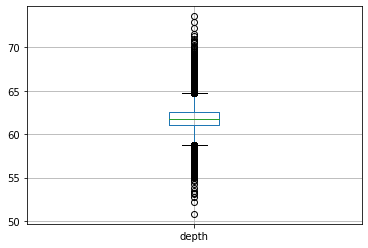

In [ ]:
Diamond.boxplot(column=['depth'])

A good numbers of outliers are seen in depth varaible.Imputation is done using median.

Imputation of depth variable using median

In [ ]:
median=Diamond['depth'].median()

In [ ]:
Diamond['depth'].replace(np.nan,median,inplace=True)

In [ ]:
Diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Now there is no missing values in data set.

Check for duplicate Data

In [ ]:
dups=Diamond.duplicated().sum()
dups

34

There are 34 records of duplicate in data set .Before doing Univariate and Bivariate anlysis we will drop the duplicate records .

In [ ]:
Diamond.drop_duplicates(inplace=True)

In [ ]:
Diamond.drop_duplicates(inplace=True)

In [ ]:
dups=Diamond.duplicated().sum()
dups

0

It is confirmed that duplicate records are dropped from data .Duplictae records are dropped 

Univariate Analysis(Check the distribution of continous variables)

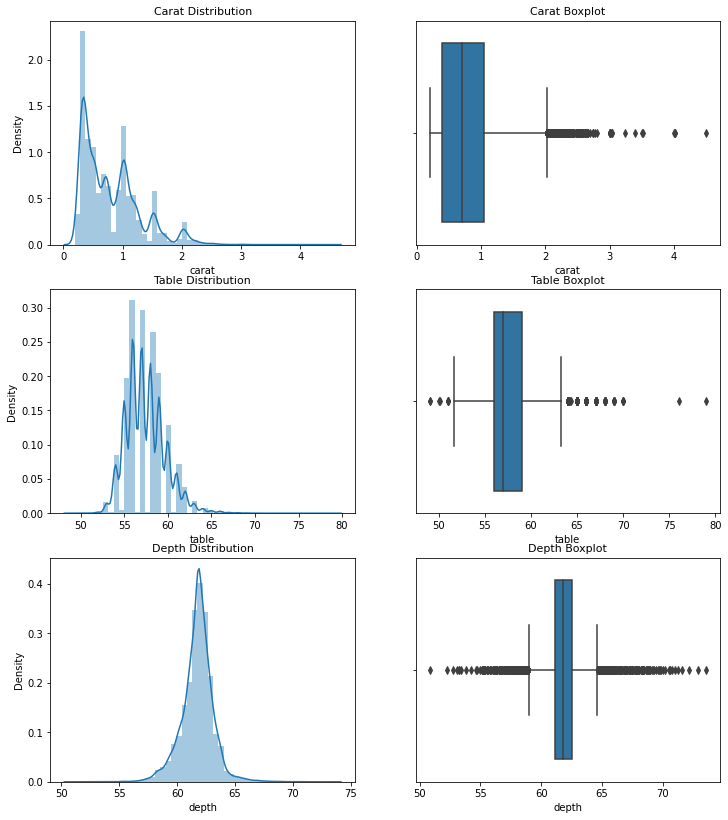

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(Diamond['carat'], ax = axes[0][0])
a.set_title('Carat Distribution', fontsize = 11)

a = sns.boxplot(Diamond['carat'],orient ="v", ax = axes[0][1])
a.set_title("Carat Boxplot",fontsize=11)

a = sns.distplot(Diamond['table'], ax = axes[1][0])
a.set_title('Table Distribution', fontsize = 11)

a = sns.boxplot(Diamond['table'],orient ="v", ax = axes[1][1])
a.set_title('Table Boxplot', fontsize = 11)

a = sns.distplot(Diamond['depth'], ax = axes[2][0])
a.set_title('Depth Distribution', fontsize = 11)

a = sns.boxplot(Diamond['depth'],orient ="v", ax = axes[2][1])
a.set_title('Depth Boxplot', fontsize = 11)
plt.show()

Text(0.5, 1.0, 'Price Distribution')

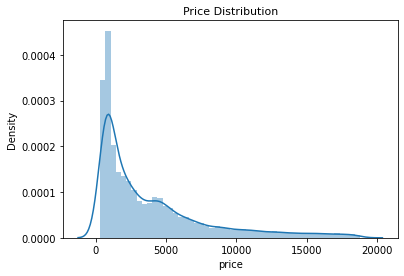

In [ ]:
a = sns.distplot(Diamond['price'])
a.set_title('Price Distribution', fontsize = 11)

The carat is not normally distributed with possible numbers of outliers. Depth more or less normally distributed with outliers. Table looks normally distribute with outliers. Price shows little skewness but with outliers .

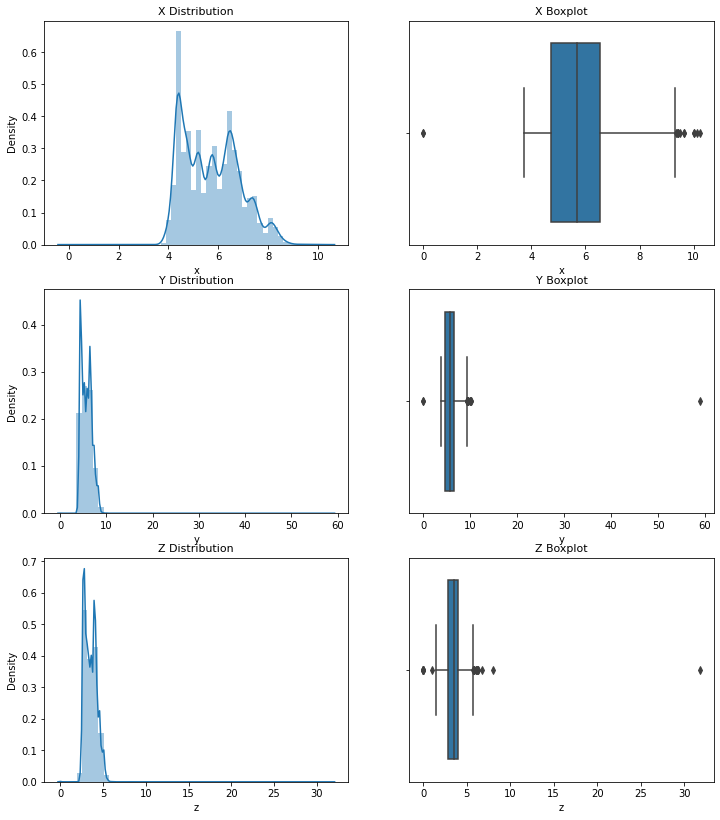

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(Diamond['x'], ax = axes[0][0])
a.set_title('X Distribution', fontsize = 11)

a = sns.boxplot(Diamond['x'],orient ="v", ax = axes[0][1])
a.set_title("X Boxplot",fontsize=11)

a = sns.distplot(Diamond['y'], ax = axes[1][0])
a.set_title('Y Distribution', fontsize = 11)

a = sns.boxplot(Diamond['y'],orient ="v", ax = axes[1][1])
a.set_title('Y Boxplot', fontsize = 11)

a = sns.distplot(Diamond['z'], ax = axes[2][0])
a.set_title('Z Distribution', fontsize = 11)

a = sns.boxplot(Diamond['z'],orient ="v", ax = axes[2][1])
a.set_title('Z Boxplot', fontsize = 11)

plt.show()


X ,y ,z all variablkes have outliers and y ,z looks very skewed . All continous variables hav outliers and need to be treated. One method of outlier treatment is capping .

Bivariate Analysis

In [ ]:
import scipy.stats as stats
import math


Joint Plot X vs Price

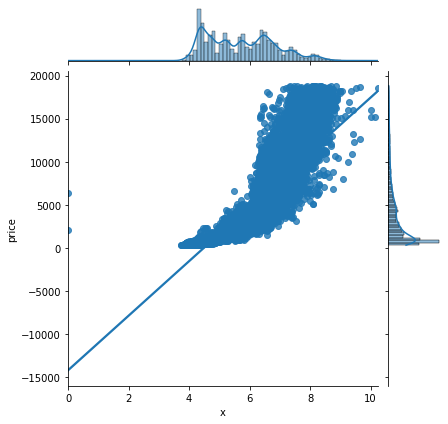

In [ ]:

sns.jointplot(Diamond['x'],Diamond['price'],kind='reg')
plt.show()

Joint plot Y vs Price

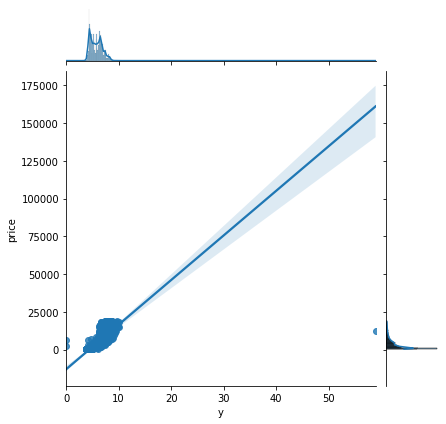

In [ ]:
sns.jointplot(Diamond['y'],Diamond['price'],kind='reg')
plt.show()

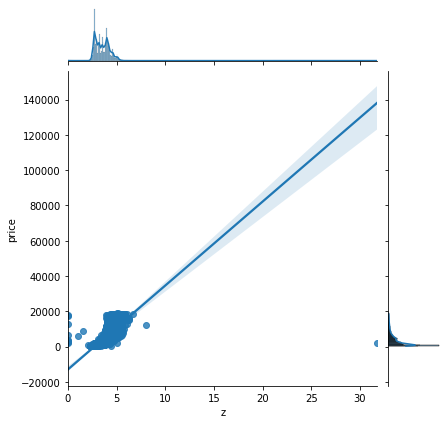

In [ ]:
sns.jointplot(Diamond['z'],Diamond['price'],kind='reg')
plt.show()

The dimensions (x,y,z)are highly positively correlated with price (.89),(.86) and (.85)respectively.

Jointplot between carat and price

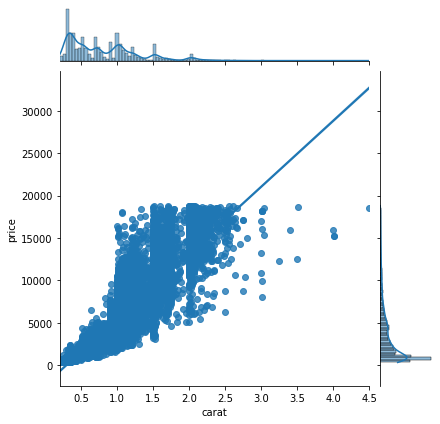

In [ ]:
sns.jointplot(Diamond['carat'],Diamond['price'],kind='reg')
plt.show()

There is highely positive correlation between carats and price (0.94). Positive correlation is a relationship between two variables in which both variables move in tandem—that is, in the same direction. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

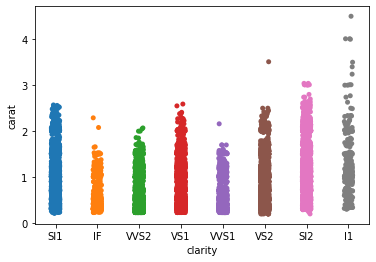

In [ ]:
sns.stripplot(Diamond['clarity'],Diamond['carat'],jitter=True)

Most of the outliers falls in l1 clarity .

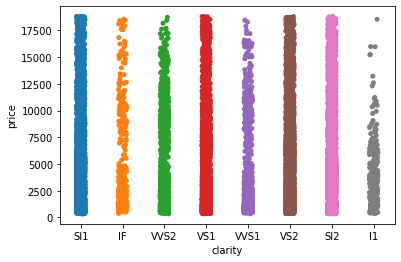

In [ ]:
sns.stripplot(Diamond['clarity'],Diamond['price'],jitter=True)

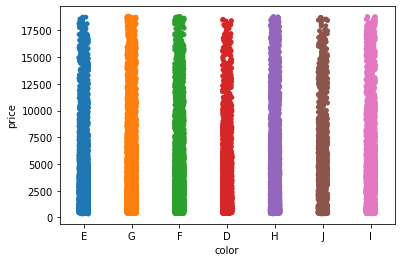

In [ ]:
sns.stripplot(Diamond['color'],Diamond['price'],jitter=True)

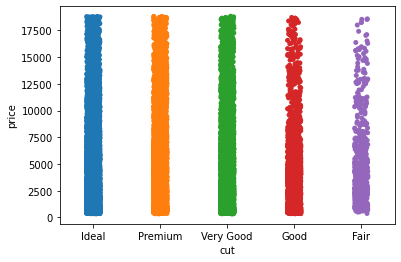

In [ ]:
sns.stripplot(Diamond['cut'],Diamond['price'],jitter=True)

Bar plot of carat vs cut of diamonds:

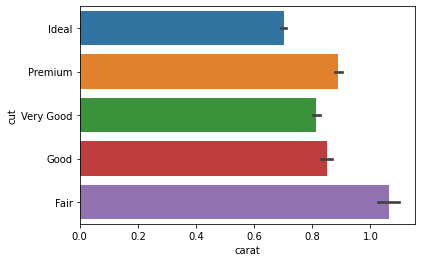

In [ ]:
sns.barplot(x = "carat", y = "cut", data = Diamond)
plt.show()

The carat of fair cut diamond is the highest followed by premium cuts and good cuts.The ideal cuts are least weighted (carat) amongs the all.

Barplot of cut vs price of diamonds:

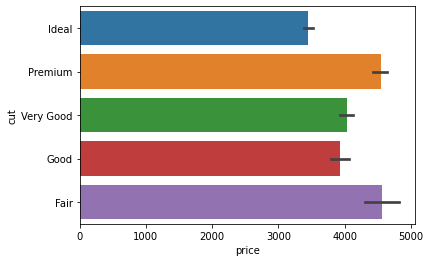

In [ ]:
sns.barplot(x = "price", y = "cut", data = Diamond)
plt.show()

The premium cut diamonds are most expensive one followed by fai cut ,and very good cuts.The ideal cut diamonds are the least expensive ones. This is the reason why the cuts are relatively considered while determing the price of diamonds. So though the fair cut are weighed diamond than premium cuts ,premium diamond being lighter are highly priced comparatively. Thus ,we can say that carat of diamond has strong impact on the price of diamonds.

Barplot of carat vs color of diamonds:

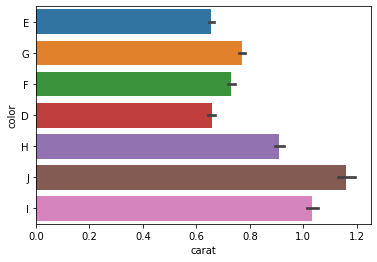

In [ ]:
sns.barplot(x = "carat", y = "color", data = Diamond)
plt.show()

The color 'j' diamonds has a highest carat (most weighed) followed by 'I' and 'H'colors respectively.The color'E' diamonds are the least in carat(weight).

Barplot of price vs color of diamonds

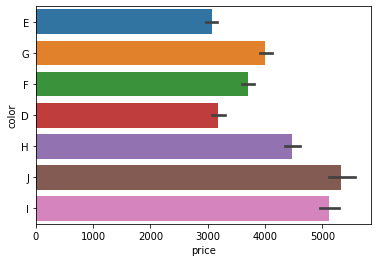

In [ ]:
sns.barplot(x = "price", y = "color", data = Diamond)
plt.show()

The color 'j' diamonds being highly weighted are also costly, followed by 'I' and 'H'colors respectively. The color'E' diamonds are lighter in carat and least in price. We could see here that the color of the diamond is also very dependent on its price.

Barplot of carat vs clarity of diamond:

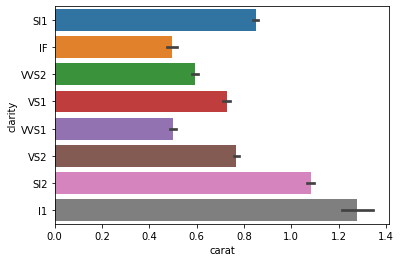

In [ ]:
sns.barplot(x = "carat", y = "clarity", data = Diamond)
plt.show()

Here ,we would say that the highest clarity is shown by I1 diamond then S12 and Sl1 etc.And the clarity of IF diamond is the least among all.

Barplot of price vs clarity

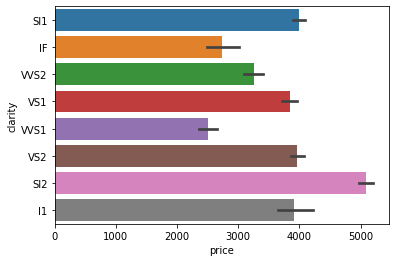

In [ ]:
sns.barplot(x = "price", y = "clarity", data = Diamond)
plt.show()

Here,we would say that the SL2 diamond is the most expensive one followed by Sl1 and l1,and VS2 etc . And VVS2 diamond is the least priced among all.Besides being the highest clarity l1 is not the most priced diamond .Comparatively its SL2 which is highly priced .

b) Cut Diamond Cut is how well a diamond is cut and polished, including how well-proportioned the stone is, its depth and symmetry.

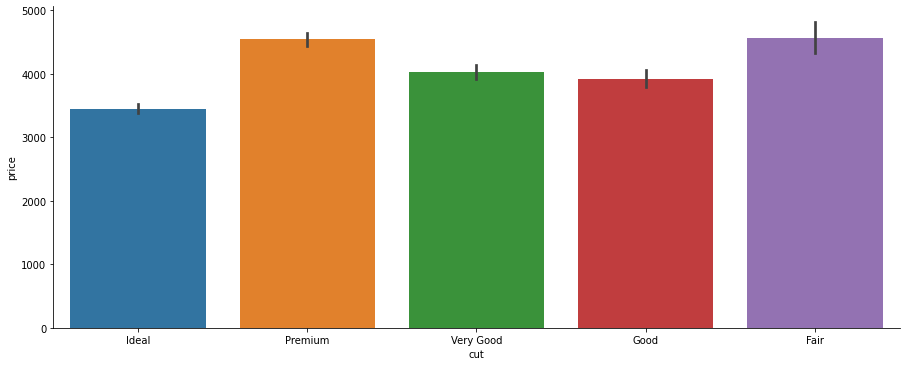

In [ ]:
# Bar plot of Cut vs Price
sns.factorplot(x='cut',y='price',data=Diamond,kind='bar',aspect=2.5 )

Ideal cut of diamond shows the highest count followed by premium ,very good etc.Fair cut has the least count among all.

Checking the value counts of cut of diamonds :

In [ ]:
Diamond.cut.value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

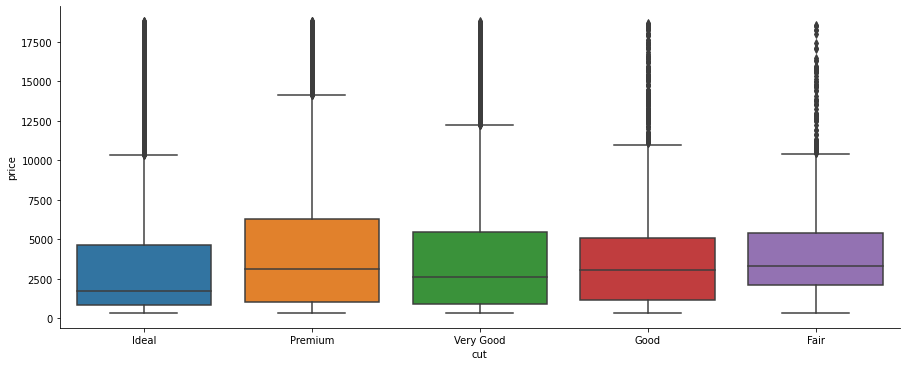

In [ ]:
# Bar plot of Cut vs Price
sns.factorplot(x='cut',y='price',data=Diamond,kind='box',aspect=2.5 )

Premium Cut diamond are most expensive followed by very good and good. With a Higher cut quality,the Diamond’s Cost per Carat Increases.

c) Color The more colourless a diamond, the more value it has and the rarer it is in the selected color range.

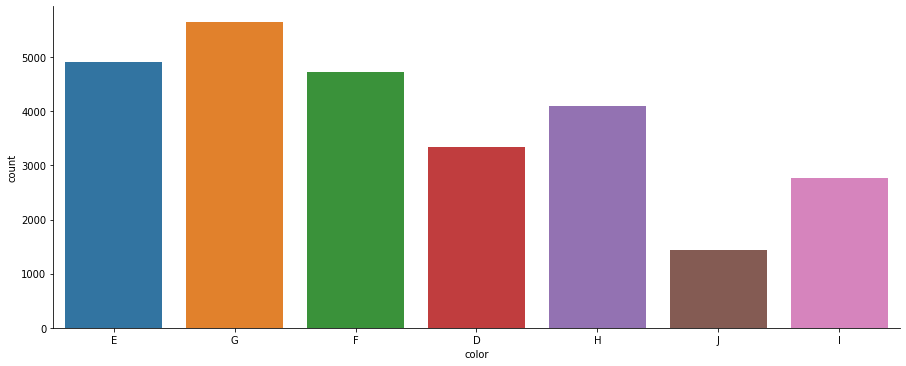

In [ ]:
# Bar plot of Color vs Price
sns.factorplot(x='color', data=Diamond , kind='count',aspect=2.5 )

Here ,we could say the color 'G'has highest count and color'J' diamonds is the least among all.

Checking the value counts of color of diamond:

In [ ]:
Diamond.color.value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

d) Clarity Diamond clarity is the quality of diamonds that relates to the existence and visual appearance of internal characteristics of a diamond called inclusions, and surface defects, called blemishes.

Checking the value count of clarity of diamond:

In [ ]:

Diamond.clarity.value_counts(normalize=True)


SI1     0.243753
VS2     0.226228
SI2     0.169458
VS1     0.151747
VVS2    0.093937
VVS1    0.068281
IF      0.033082
I1      0.013515
Name: clarity, dtype: float64

The SL1 shows the highest clarity counts followed by VS2 and then SI2 etc .The l1 shows the lowest clarity amongs the all.

Boxplot for clarity vs price of diamond:

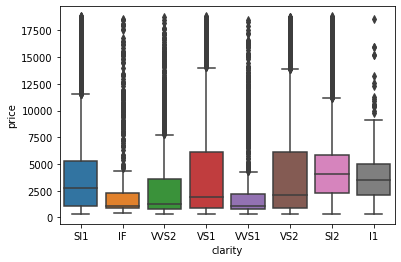

In [ ]:
sns.boxplot(x='clarity', y='price', data=Diamond )

A horizontal line has r=0. This means that there is no relationship between the two variables and the Y values are just randomly scattered on the grid.

We can say that VS1 and VS2 affect the Diamond's Price equally and have quite high price margins.While the IF calrity diamonds shows the least price margins.

e)Depth Diamond depth is a crucial factor of a diamond's cut. The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface). If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an attractive amount of light.

Jointplot of depth vs price

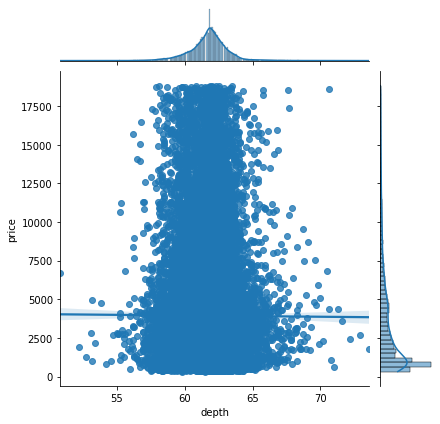

In [ ]:
sns.jointplot(Diamond['depth'],Diamond['price'],kind='reg')
plt.show()

A horizontal line has r=0. This means that there is no relationship between the two variables and the Y values are just randomly scattered on the grid.

We can say that VS1 and VS2 affect the Diamond's Price equally and have quite high price margins.While the IF calrity diamonds shows the least price margins.

We can Infer from the plot that the Price can vary heavily for the same Depth. And the Pearson's Correlation # The correlation between depth and price is negative with -0.0026. They are showing the inverse relationship.

f) Table In simpler way table is the width of diamond and is expressed as percentage of its average daimeter. A diamond's table is the flat facet on its surface — the large, flat surface facet that you can see when you look at the diamond from above. As the largest facet on a diamond, the table plays a major role in determining how brilliant (sparkly) the diamond is. And when the facet is too small then lights gets trapped and it will leak from other place of diamond.

Jointplot of table vs price of diamond

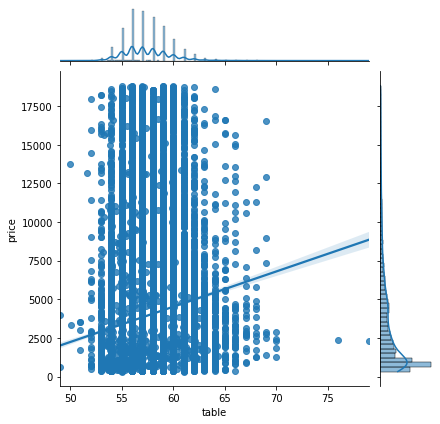

In [ ]:
sns.jointplot(Diamond['table'],Diamond['price'],kind='reg')
plt.show()

There is slightly positive correlation between table and price and the value is very low(0.13). Positive correlation is a relationship between two variables in which both variables move in tandem—that is, in the same direction. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

Checking for values equal to zero in data:

In [ ]:
(Diamond.x == 0).sum()

2

In [ ]:
# Checking the rows with x=0:
Diamond[Diamond.x == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [ ]:
(Diamond.y == 0).sum()

2

Checking the rows with y=0:

In [ ]:
Diamond[Diamond.y == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [ ]:
(Diamond.z == 0).sum()

8

Checking the rows with z=0:



In [ ]:
Diamond[Diamond.z == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


 We'll Drop zero values  as it seems better choice instead of filling them with any of Mean or Median values.

In [ ]:
Diamond= Diamond[(Diamond[['x','y','z']] != 0).all(axis=1)]

In [ ]:
# Dropping Rows with Dimensions 'Zero'
# Just to Confirm
Diamond.loc[(Diamond['x']==0) | (Diamond['y']==0) | (Diamond['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [ ]:
(Diamond.x == 0).sum()

0

In [ ]:
(Diamond.y == 0).sum()

0

In [ ]:
(Diamond.z == 0).sum()

0

There are no zero values in the data set now.

Unique values of Categorical variables

In [ ]:
for column in Diamond.columns:
  if Diamond[column].dtype == 'object':
    print(column.upper(),':', Diamond[column].unique())
    print(Diamond[column].value_counts().sort_values())
    print('\n')

CUT : ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR : ['E' 'G' 'F' 'D' 'H' 'J' 'I']
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY : ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




Cut has 5 unique levels ,Color has 7 unique levels and Clarity has 8 unique levels.

Pairplot

In [ ]:
plt.figure(figsize=(10,12))
sns.pairplot(Diamond,hue ="color",height=5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Correleation using corr() and heatmap using seaborn library

In [ ]:
Diamond.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035101,0.181511,0.977908,0.942378,0.946774,0.922400
depth,0.035101,1.000000,-0.293356,-0.018184,-0.024196,0.097134,-0.002683
table,0.181511,-0.293356,1.000000,0.197517,0.183545,0.151034,0.126967
x,0.977908,-0.018184,0.197517,1.000000,0.962510,0.961010,0.887467
y,0.942378,-0.024196,0.183545,0.962510,1.000000,0.932974,0.857255
z,0.946774,0.097134,0.151034,0.961010,0.932974,1.000000,0.855775
price,0.922400,-0.002683,0.126967,0.887467,0.857255,0.855775,1.000000


Get the Correlation Heatmap

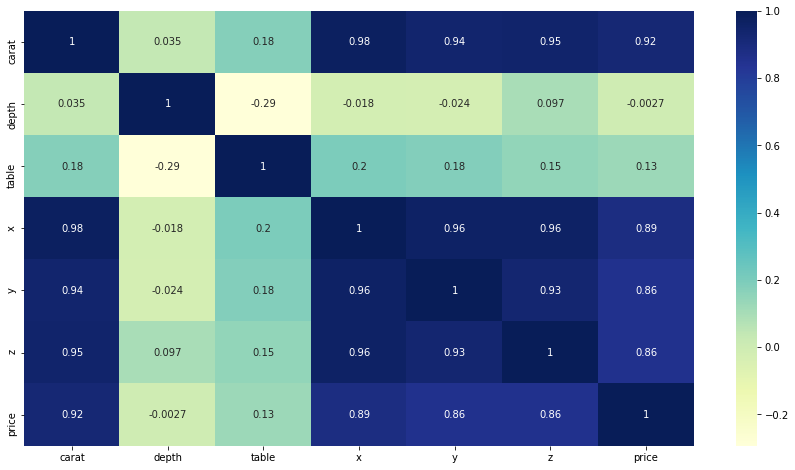

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(Diamond.corr(),annot=True,cmap='YlGnBu')
plt.show()


From the plot above, we could conclude that x(.91), y(.91), z(.91) have strong correlations with price . The carat has the strongest positive correlation with price (0.94) & the table(0.14) and depth negative correlation (-.00084) have the weakest correlations . It is amazing to see that carat correlates best with price variable .Its score is pretty high.

Feature analysis

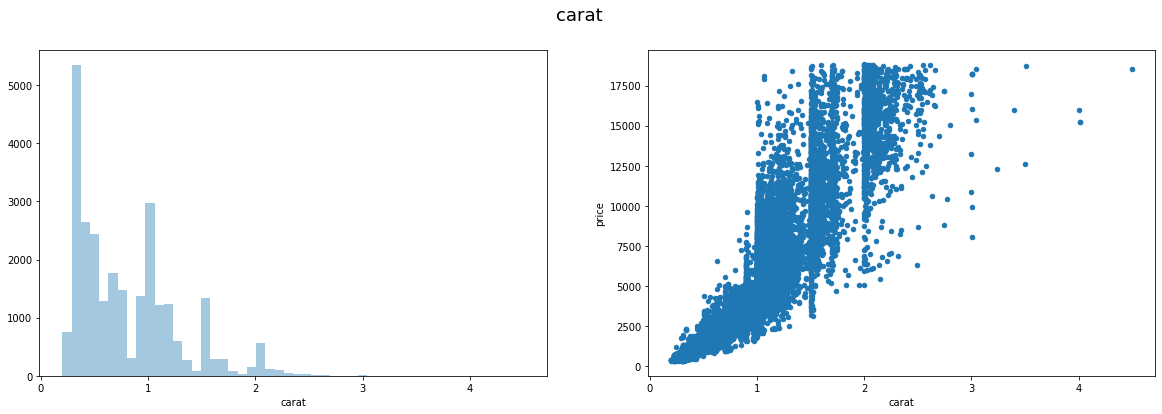

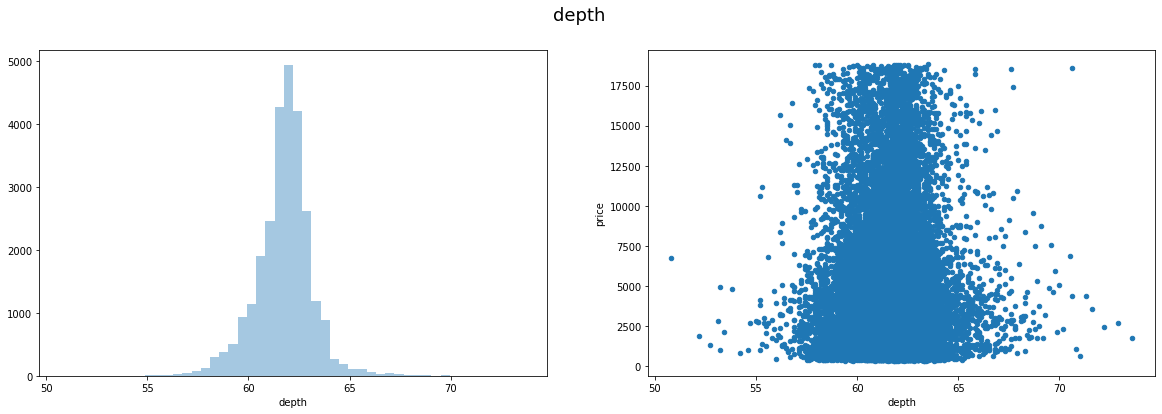

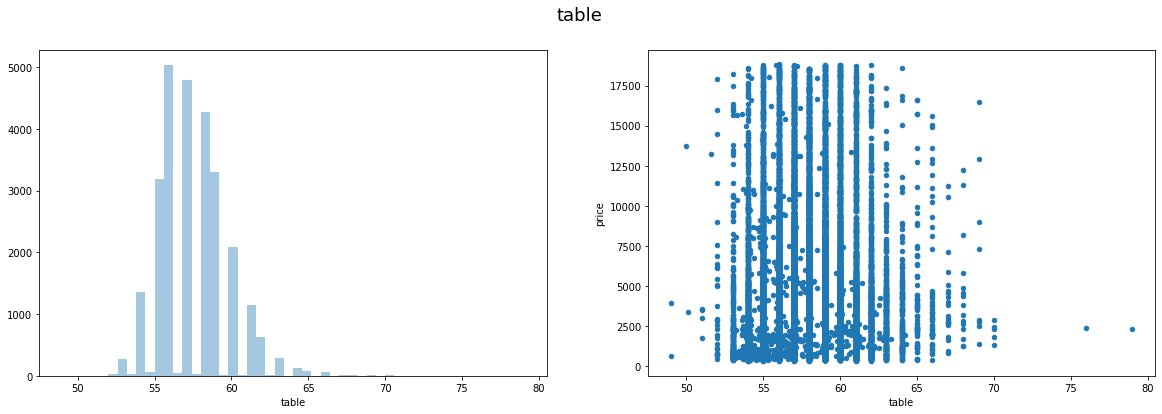

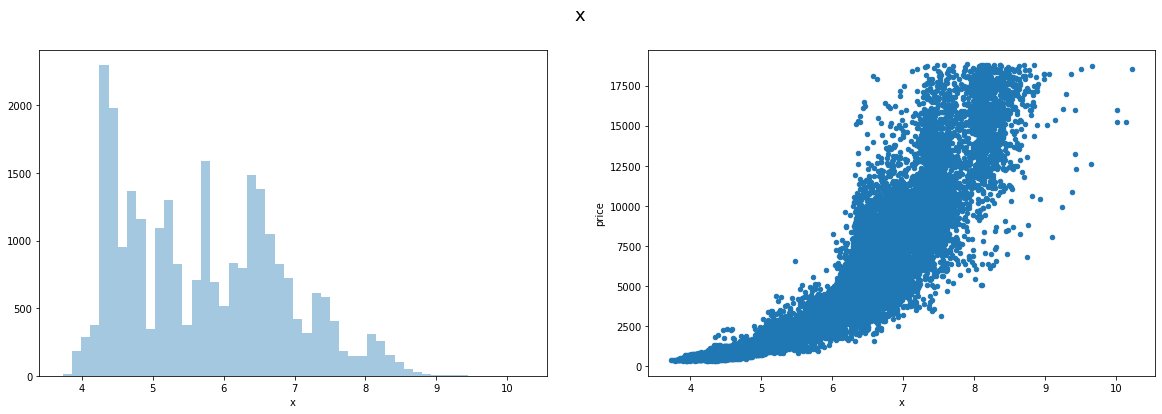

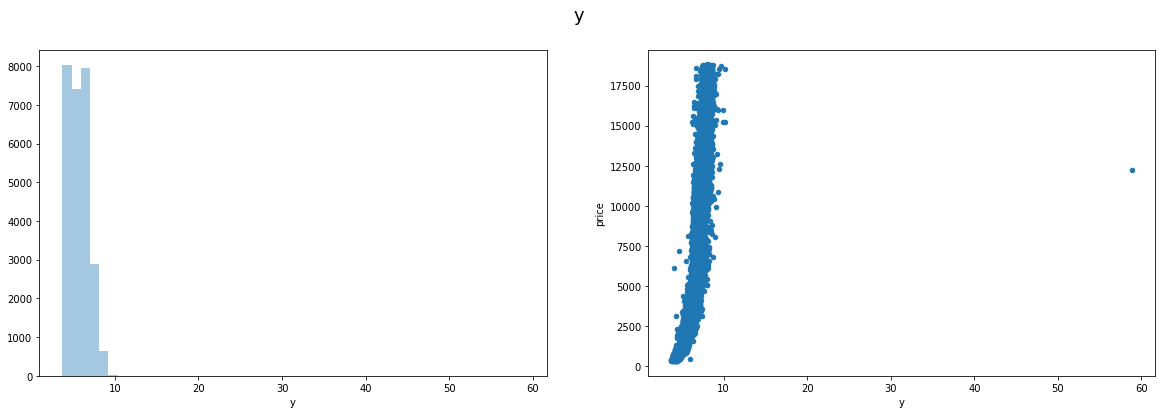

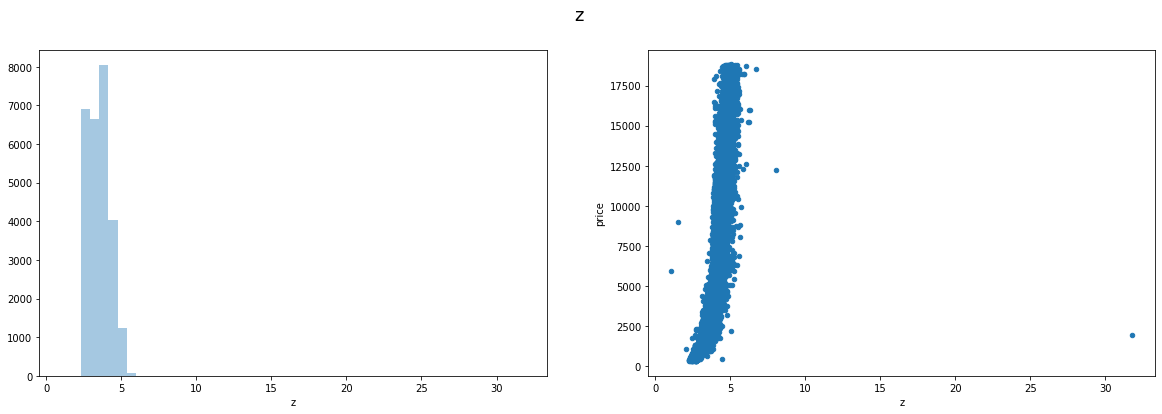

In [ ]:
# Numerical Features

for col in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(col, fontsize=18)
    sns.distplot(Diamond[col], ax=ax[0], kde=False)
    Diamond[[col]+['price']].plot.scatter(x=col, y='price', ax=ax[1])
    plt.show()


Checking the object datatype

In [ ]:
Diamond.select_dtypes(include='object').head(10)

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1
5,Ideal,D,VS2
6,Good,H,SI1
7,Premium,E,SI1
8,Good,H,SI1
9,Ideal,F,VS2


There are 3 objects dtypes in data as cut ,color and clarity variable.Just to overview the type of data that object category holds. All the object variable needs to be converted to int dtypes.

Skewness of data

In [ ]:
Diamond.skew()

carat    1.114871
depth   -0.028403
table    0.764890
x        0.402010
y        3.888607
z        2.639529
price    1.619055
dtype: float64

Check Data Types:

In [ ]:
Diamond.dtypes.value_counts()

float64    6
object     3
int64      1
dtype: int64

Treating the outliers in continous variables

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

We are making a small function -known as remove outlier.This function gives us quartile 1 and quartile 3 values .Then lower range and upper range is callculated .This function return th eupper range and lower range. For treatment of outliers we will look at the the values.Wherever the values are less than the lower range we will cap it with the lower range .Wherever the values is higher then upper range we will cap it with upper range.

In [ ]:
for column in Diamond.columns:
    lr,ur=remove_outlier(Diamond['carat'])
    Diamond['carat']=np.where(Diamond['carat']>ur,ur,Diamond['carat'])
    Diamond['carat']=np.where(Diamond['carat']<lr,lr,Diamond['carat'])

    lr,ur=remove_outlier(Diamond['depth'])
    Diamond['depth']=np.where(Diamond['depth']>ur,ur,Diamond['depth'])
    Diamond['depth']=np.where(Diamond['depth']<lr,lr,Diamond['depth'])

    lr,ur=remove_outlier(Diamond['table'])
    Diamond['table']=np.where(Diamond['table']>ur,ur,Diamond['table'])
    Diamond['table']=np.where(Diamond['table']<lr,lr,Diamond['table'])

   
    lr,ur=remove_outlier(Diamond['price'])
    Diamond['price']=np.where(Diamond['price']>ur,ur,Diamond['price'])
    Diamond['price']=np.where(Diamond['price']<lr,lr,Diamond['price'])

Here the values for variables are found out compared with upper range if it is greater than we are capping with the upper range .Storing it back into the same variable. Similarly we are checking the values and copmparing with lower range . If the values are less than the lower range we are capping with the lower range and storing in the v ariables.

Outlier Check

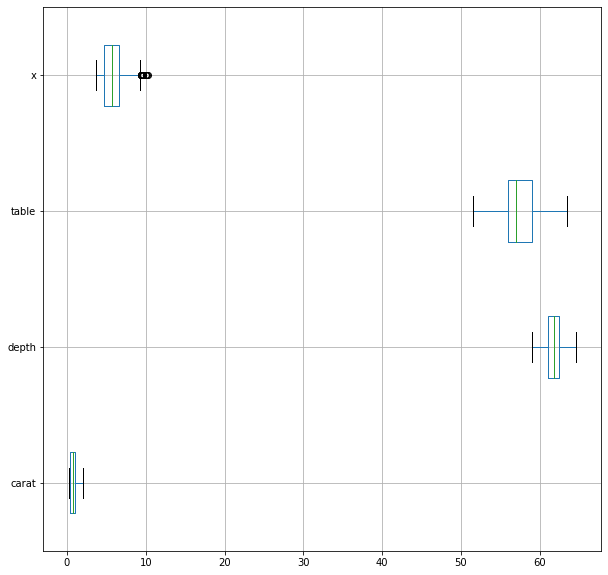

In [ ]:
plt.figure(figsize=(10,10))
Diamond.iloc[:,0:7].boxplot(vert=0)

Linear regression in Python can take only numerical / categorical columns. It cannot take string / object types.

Converting Categorical variables to dummy variables . As cut ,color and clarity are available as an object type of variables 

Encoding Data 

In [ ]:
Diamond=pd.get_dummies(Diamond,columns=['cut','color','clarity'],drop_first=True)

Handling Multicollinearity

In [ ]:
Diamond.drop(['x','y','z'],axis=1,inplace=True)

Dropping highly correlated variables x,y and z.

Final data set

In [ ]:
Diamond.head()

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,499.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,984.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6289.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,1082.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,779.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Scaling Scaling the variables as the continous variable has different weightage. Scaling the data returns the z-scores of each attributes.

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
Diamond['carat']=std_scale.fit_transform(Diamond[['carat']])
Diamond['depth']=std_scale.fit_transform(Diamond[['depth']])
Diamond['table']=std_scale.fit_transform(Diamond[['table']])

From the description of data variables carat ,depth anfd table are of different weights and to avoid the algorithm to give hoigher weigtage to these varaibles with high values.We will scale the datasets. We are importing standard preprocessing library and importing standard scaler function here . Using standard scaler which is fit transform i am doing a scaling of carat ,depth and table here .

Train-Test Split

We are creating here two variables X and Y .Dropping the price which means x only have the predictor variables . and Y has only target variable.

Copying all the predictor variables into X data frames

In [ ]:
X=Diamond.drop('price',axis=1)


Copying the target varible into y dataframe

In [ ]:
y=Diamond[['price']]

In [ ]:
X.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.067382,0.286766,0.261968,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.002446,-0.780365,0.261968,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0.231349,0.368853,1.189326,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.807636,-0.123669,-0.665390,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,-1.045737,-1.108713,0.725647,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


Split X and y into training and test in 70:30 ratios

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

Method -1 using skleran Library Linear Regression Model

Invoke the LinearRegression function and find the bestfit model on training data

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let us explore the coefficients for each of the independent attributes

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 3708.6027724515156
The coefficient for depth is -12.692436257987538
The coefficient for table is -49.50471429160935
The coefficient for cut_Good is 474.152563704247
The coefficient for cut_Ideal is 706.7314410971205
The coefficient for cut_Premium is 639.561591268087
The coefficient for cut_Very Good is 606.6328548189924
The coefficient for color_E is -188.96158385431
The coefficient for color_F is -242.58942864480693
The coefficient for color_G is -421.85615491556354
The coefficient for color_H is -829.3653150586906
The coefficient for color_I is -1315.5924937263526
The coefficient for color_J is -1844.9583248079693
The coefficient for clarity_IF is 4106.882525220235
The coefficient for clarity_SI1 is 2575.5267025237904
The coefficient for clarity_SI2 is 1747.3176668845354
The coefficient for clarity_VS1 is 3415.8589432472186
The coefficient for clarity_VS2 is 3131.4981223279283
The coefficient for clarity_VVS1 is 3882.4036718298025
The coefficient for cla

We observed the positive and negative beta coefficient of independent variables . Allcut coefficients are positive which means cuts have positive impact on the price of gem stone . All color are negative which means clors have negative impact on the price of gem stone . Clarity all coefficents are positive .

Let us check the intercept for the model

In [ ]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 719.3746234955261


The intercept of model is very high which means the existing variables are not able to capture the completee variability of dependent variables and some more independent variables are required .It indicates we must look at some more features in data .

Model score - R2 or coeff of determinant on train data

In [ ]:
regression_model.score(X_train, y_train)

0.9394690509831329

94% of variation in the price is explained by the available predictors in model

Model score - R2 or coeff of determinant(test)
R^2=1–RSS / TSS = RegErr / TSS

In [ ]:
regression_model.score(X_test, y_test)

0.9405936122456131

Calculate the RMSE(Root Mean square Error) on train data set

In [ ]:
import math
mse = np.mean((regression_model.predict(X_train)-y_train)**2)
math.sqrt(mse)

850.8331689516976

Calculate the RMSE(Root Mean square Error) on test data set

In [ ]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

849.4362607426486

Predict price for a set of attributes not in the training or test set

In [ ]:
y_pred = regression_model.predict(X_test)

Since this is regression, plot the predicted y value vs actual y values for the test data
A good model's prediction will be close to actual leading to high R and R2 values

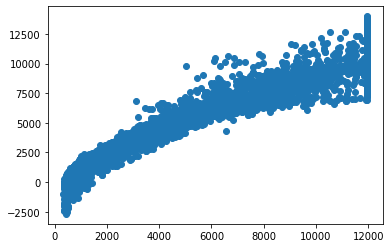

In [ ]:
plt.scatter(y_test['price'], y_pred)

Method II-Linear Regression Model using stts Model

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# Concatenate  X and y into single dataframe


In [ ]:
data_train=pd.concat([X_train,y_train],axis=1)

In [ ]:
data_train.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5030,0.664259,1.271811,-0.665390,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4065.0
12108,0.469450,1.846420,-0.665390,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5166.0
20181,-0.266498,-0.862452,1.838477,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1708.0
4712,-0.071688,-2.257931,2.580364,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2447.0
2548,0.469450,0.861376,0.725647,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,6618.0


In [ ]:
data_train.columns

Index(['carat', 'depth', 'table', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'price'],
      dtype='object')

Renaming column which has space in the name Normally for stats model if the vraiable ontains space it creats a proved so it is better to rename it .

In [ ]:
data_train.rename(columns={"cut_Very Good":"cut_Very_Good"},inplace=True)

In [ ]:
formula= 'price ~ carat+depth+table+cut_Good+cut_Ideal+cut_Premium+cut_Very_Good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2'

Creating an ols

In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula,data = data_train).fit()
lm1.params

Intercept         719.374623
carat            3708.602772
depth             -12.692436
table             -49.504714
cut_Good          474.152564
cut_Ideal         706.731441
cut_Premium       639.561591
cut_Very_Good     606.632855
color_E          -188.961584
color_F          -242.589429
color_G          -421.856155
color_H          -829.365315
color_I         -1315.592494
color_J         -1844.958325
clarity_IF       4106.882525
clarity_SI1      2575.526703
clarity_SI2      1747.317667
clarity_VS1      3415.858943
clarity_VS2      3131.498122
clarity_VVS1     3882.403672
clarity_VVS2     3853.688430
dtype: float64

Summary statsitics of Linear regression stats model

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:28:25   Log-Likelihood:            -1.5389e+05
No. Observations:               18847   AIC:                         3.078e+05
Df Residuals:                   18826   BIC:                         3.080e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       719.3746     64.804     11.101

R squared value is 93.9% and adjusted R -squaredvalue is 93.9% ,AIC and BIC values .

All variable has p-value close to zero or less than 0.05 .Only for depth the p-value is greater than 0.05 that is 0.078. Indicating depth is the only variable which is not significant .

Interpreation of coefficients : For carat the b coeffiecient is 3708.60 keeping all variables constant a unit increase in carat will increase th eprice by 3708.60 For categorical variable cut ,all the beta coedficinet values are positive and the highest coeffiecient value available is 706 for cut_ideal. Higher is the beta coefficient higher is the impact of independent variable on target variable which is price here. If it is positive value it has positive impact ,if it is negative value it will have negative impact on target value. Cut_ideal with highest beta coefficient means that if the cur type is ideal keeping all other coefficinet constant a unit increase in cut ideal will increase the price of gem stone by 706 . Coming onto the colors all the beta coefficients are negative which means color has a negative impact on the price . color_j has the highest negative coefficient -1844 which means if color is J then price will decrease by 1844 keeping everything else as constant .

if we look at the data dictionary ideal cut was the best cut and color J was the worst color. The ressults are also matching whith the details shared with us . Onto the clarity we have all positive coefficients . Clarity_IF has the highest positive coefficient. The important point to be noted here is the condition number -31.9 (This is also low) .Ideally the condition number should be close to 1. In case if we dont check the multicollinearity in that case the condition number comes to be very high with an error that multicollinearity exist .

But in our case the model is okay .

The model is used to predict the price of gem stone

Using train data set prediction is done

In [ ]:
predict_train=lm1.predict(data_train)
data_train['predicted_price']=predict_train
data_train.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,predicted_price
5030,0.664259,1.271811,-0.665390,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4065.0,5232.155360
12108,0.469450,1.846420,-0.665390,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5166.0,4823.832259
20181,-0.266498,-0.862452,1.838477,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1708.0,1941.030996
4712,-0.071688,-2.257931,2.580364,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2447.0,2982.252843
2548,0.469450,0.861376,0.725647,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,6618.0,6047.085809


In [ ]:
# Calculate the mse 
mse=np.mean((data_train['predicted_price']-data_train['price'])**2)
mse

723917.0813883889

In [ ]:
import math

In [ ]:
math.sqrt(mse)

850.8331689516981

In [ ]:
# Redo the Renaming the column which has the space in name
X_test.rename(columns={'cut_Very Good':'cut_Very_Good'},inplace=True) 

In [ ]:
X_test.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
11971,1.551726,1.025550,0.725647,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3294,0.491095,-0.780365,0.261968,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
25427,2.666470,-1.437061,0.261968,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
709,1.984636,0.122592,1.653006,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
8010,1.530080,1.764333,0.725647,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
data_test=pd.concat([X_test,y_test],axis=1)
data_test.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
11971,1.551726,1.025550,0.725647,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,8758.0
3294,0.491095,-0.780365,0.261968,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4718.0
25427,2.666470,-1.437061,0.261968,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11965.0
709,1.984636,0.122592,1.653006,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,11965.0
8010,1.530080,1.764333,0.725647,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,8165.0


Using test data set prediction of price is done



In [ ]:
predict_test=lm1.predict(data_test)
data_test['predicted_price']=predict_test
data_test.head()

,carat,depth,table,cut_Good,cut_Ideal,cut_Premium,cut_Very_Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,predicted_price
11971,1.551726,1.025550,0.725647,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,8758.0,8291.736871
3294,0.491095,-0.780365,0.261968,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4718.0,5330.820202
25427,2.666470,-1.437061,0.261968,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11965.0,13000.404008
709,1.984636,0.122592,1.653006,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,11965.0,11776.117149
8010,1.530080,1.764333,0.725647,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,8165.0,9111.803578


Calculate the MSE on test data

In [ ]:
mse=np.mean((data_test['predicted_price']-data_test['price'])**2)
mse

721541.9610644538

In [ ]:
import math

In [ ]:
math.sqrt(mse)

849.4362607426491

RMSE error is close to 849 for test data .

Plot between th eprice and the predicted price to find the best fit line

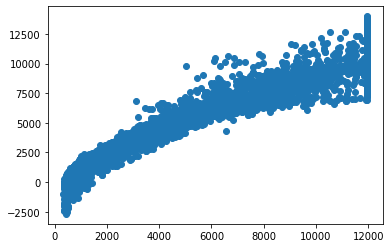

In [ ]:
plt.scatter(data_test['price'],data_test['predicted_price'])

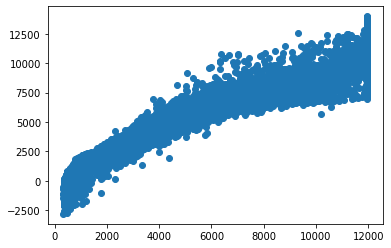

In [ ]:
plt.scatter(data_train['price'],data_train['predicted_price'])

# The plot is showing us a best fit line 

To calculate adjusted R2 value for test data using formula

In [ ]:
SS_Residual=sum((data_test['price']-data_test['predicted_price'])**2)
SS_Total=sum((data_test['price']-np.mean(data_test['price']))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1-(1-r_squared)*(len(y)-X.shape[1]-1)
print(r_squared,adjusted_r_squared)

0.9405936122456127 -1597.269456144037


SS-Residuel=Square of difference between the available price and predicted price is done then taking a sum of it . SS-Total=Mean of the price value subtracting it from price doing a square Calculating R square and adjusted r square for the test data set .

# When we are comparing the adjusted R square and Rmse of train and test data set  are plus minus 10% .The model is valid model

Conclusion :

1.The final Linear regression equation is 
2.When carat increases by 1 unit price increases by 3708.60 keeping all other variable constant .
3.Tables and depth have a negative impact on the price .
4.All types of the cuts have the positive beta coefficients with cut ideal with the highest beta coefficient indicating the price to be highest if the cut is ideal.

5.Allcolors have the negative impact on the price.
Which means th eprence of any type of colors will reduce the price by the respective coefficient .
6.Clarity IF has the highest positive magnitude in comparison to other clarity types.Higher the magnitude most important is that predictor .



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [ ]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 1.3198151885933957
depth ---> 1.307587774296988
table ---> 1.7622479501947164
cut_Good ---> 3.497381235941739
cut_Ideal ---> 14.1567960972657
cut_Premium ---> 8.598537037203606
cut_Very Good ---> 7.580403422189603
color_E ---> 2.367173847797493
color_F ---> 2.3216022001601506
color_G ---> 2.6593050435614773
color_H ---> 2.195048788537957


 The higher VIF indicates the multicollinearity issue .Both correlation coefficient and VIF are used to verify multicollinearity. Dohoo et al. (1997) argued that multicollinearity is certain at the 0.9 level of a correlation coefficient or higher . On the other hand, the VIF values for included variables should be below 10. If any (correlation coefficient or VIF) critical value is higher than described above, you should remove one of correlated independent variables from your set, or estimate two separated models.

The best 5 feature important for preductionof price of gem stone are carat ,depth ,table,cut_Good and Color_E respectively.

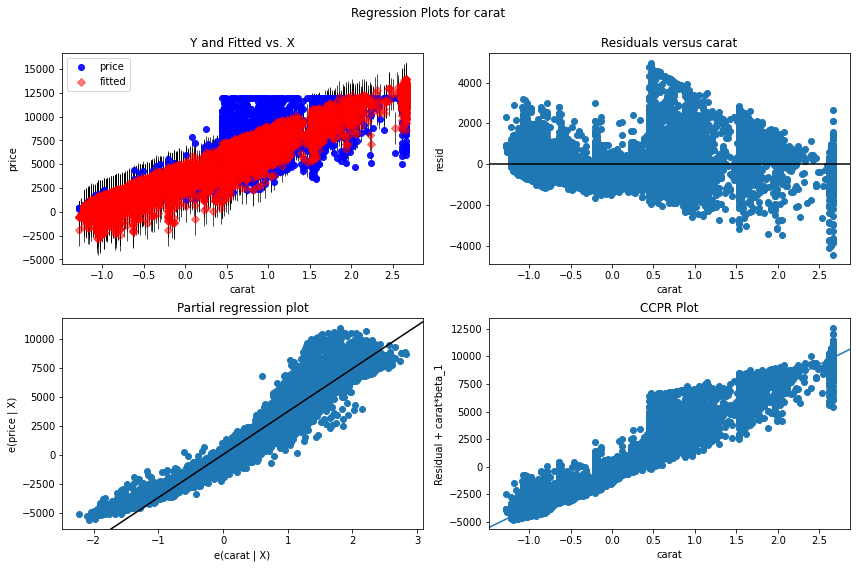

In [ ]:
fig=plt.figure(figsize=(12,8))

fig =sm.graphics.plot_regress_exog(lm1,'carat',fig=fig)

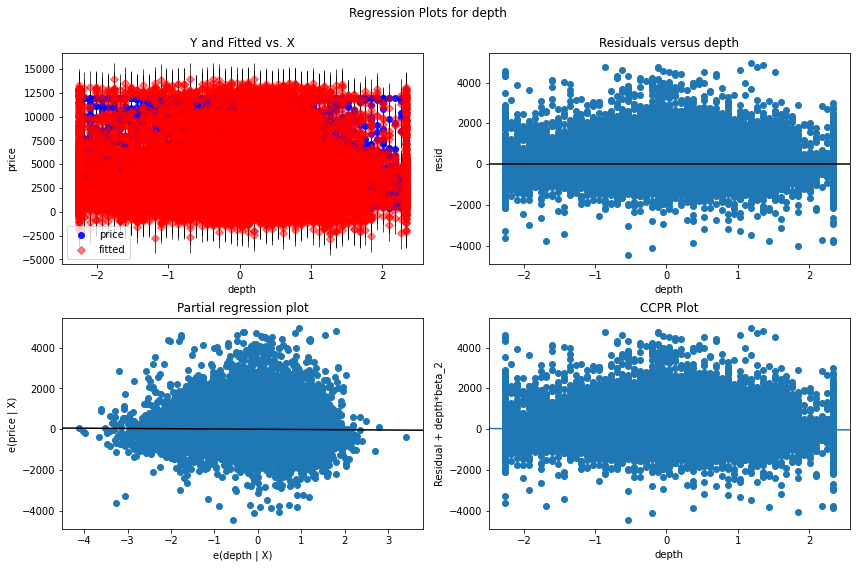

In [ ]:
fig=plt.figure(figsize=(12,8))

fig =sm.graphics.plot_regress_exog(lm1,'depth',fig=fig)